<a href="https://colab.research.google.com/github/ronega/stat222-project/blob/main/EDA/222_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
path = '/content/drive/MyDrive/transactions_ds.csv'
df = pd.read_csv(path, sep=';')
df['date'] = pd.to_datetime(df['date'], utc=True)
df

,item_id,quantity,price_ht,price_ttc,transaction_id,date
0,0,1.0,12.42,13.1,1,2018-03-08 13:10:59+00:00
1,1,1.0,12.42,13.1,1,2018-03-08 13:10:59+00:00
2,2,1.0,12.42,13.1,1,2018-03-08 13:10:59+00:00
3,3,1.0,12.42,13.1,1,2018-03-08 13:10:59+00:00
4,1,1.0,11.56,12.2,2,2018-03-08 13:12:07+00:00
...,...,...,...,...,...,...
458725,11,1.0,1.14,1.2,311970,2022-08-18 18:38:26+00:00
458726,45,1.0,5.02,5.3,311972,2022-08-18 18:43:42+00:00
458727,11,1.0,5.02,5.3,311972,2022-08-18 18:43:42+00:00
458728,11,1.0,1.14,1.2,311973,2022-08-18 18:47:43+00:00


In [50]:
df.item_id.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106])

In [13]:
df = df.groupby(['item_id', 'transaction_id'], as_index=False).first()

### Time Series Exploratory Data Analysis 

In [19]:
import datetime
import plotly.express as px

In [69]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dt'] = df['date'].dt.date
df['weekday'] = df['date'].dt.day_name()
df['weekday_num'] = df['date'].dt.weekday

df['revenue'] = df["quantity"]*df["price_ht"]

In [27]:
yearly = df.groupby(['year'])['transaction_id'].count().reset_index().sort_values(by=['year'])

In [39]:
weekday = df.groupby(['weekday', 'weekday_num'])['transaction_id'].count().reset_index().sort_values(by=['weekday_num'])


In [29]:
yearly

,year,transaction_id
0,2018,63578
1,2019,87514
2,2020,91956
3,2021,123254
4,2022,75891


In [40]:
weekday

,weekday,weekday_num,transaction_id
1,Monday,0,824
5,Tuesday,1,55081
6,Wednesday,2,46995
4,Thursday,3,50551
0,Friday,4,48924
2,Saturday,5,95498
3,Sunday,6,144320


In [30]:
fig = px.bar(yearly, x='year', y="transaction_id")
fig.show()

In [42]:
monthly = df.groupby(['month'])['transaction_id'].count().reset_index().sort_values(by=['month'])

In [43]:
fig = px.bar(monthly, x='month', y="transaction_id")
fig.show()

In [41]:
fig = px.bar(weekday, x='weekday', y="transaction_id")
fig.show()

In [47]:
daily = df.groupby(['dt'])['transaction_id'].count().reset_index().sort_values(by=['dt'])
fig = px.line(daily, x='dt', y="transaction_id")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [51]:
daily = df.groupby(['dt'])['price_ht'].sum().reset_index().sort_values(by=['dt'])
fig = px.line(daily, x='dt', y="price_ht")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [63]:
yearly_item = df.groupby(['year', 'item_id'])['transaction_id'].count().reset_index().sort_values(by=['year'])

In [67]:
fig = px.bar(yearly_item, x='item_id', y="transaction_id", color="year")
             #color_continuous_scale=[(2018, "yellow"), (2019, "orange"), (2020, "red"), 
              #                       (2021, "green"), (2022, "blue")])
fig.show()

Most popular items are **11**, **55**, **26**

In [80]:
yearly_item = df.groupby(['year', 'item_id'])['price_ht'].sum().reset_index().sort_values(by=['year'])

In [81]:
fig = px.bar(yearly_item, x='item_id', y="price_ht", color="year")
             
fig.show()

In [95]:
item115526 = df.loc[(df['item_id'] == 11) | (df['item_id'] == 55) | (df['item_id'] == 26)]
item115526 = item115526[['item_id', 'price_ht']]

In [104]:
df11 = df.loc[(df['item_id'] == 11)]

In [108]:
df.head()

,item_id,transaction_id,quantity,price_ht,price_ttc,date,month,year,dt,weekday,weekday_num,revenue
0,0,1,1.0,12.42,13.1,2018-03-08 13:10:59+00:00,3,2018,2018-03-08,Thursday,3,12.42
1,0,3,1.0,10.05,10.6,2018-03-08 13:12:18+00:00,3,2018,2018-03-08,Thursday,3,10.05
2,0,7,1.0,0.00,0.0,2018-03-08 13:16:50+00:00,3,2018,2018-03-08,Thursday,3,0.00
3,0,16,1.0,12.23,12.9,2018-03-08 14:21:13+00:00,3,2018,2018-03-08,Thursday,3,12.23
4,0,32,1.0,12.23,12.9,2018-03-08 14:56:08+00:00,3,2018,2018-03-08,Thursday,3,12.23


In [110]:
import seaborn as sns

In [115]:
item115526

,item_id,price_ht
47170,11,0.00
47171,11,0.00
47172,11,6.73
47173,11,61.61
47174,11,0.00
...,...,...
394842,55,2.84
394843,55,1.42
394844,55,1.42
394845,55,1.42


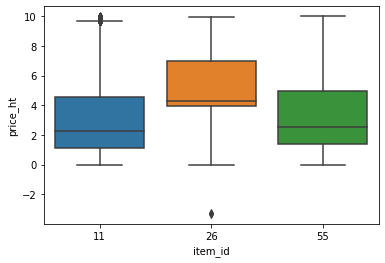

In [133]:
sns.boxplot(data=item115526[item115526['price_ht'] < 10], x='item_id', y='price_ht');